# Unsupervised Learning

This section marks our journey into another significant domain of machine learning and AI: unsupervised learning. Rather than delving deep into theoretical intricacies, our focus here will be on offering a practical guide. We aim to equip you with a clear understanding and effective tools for employing unsupervised learning methods in real-world (EO) scenarios.

It's important to note that, while unsupervised learning encompasses a broad range of applications, our discussion will predominantly revolve around classification tasks. This is because unsupervised learning techniques are exceptionally adept at identifying patterns and categorising data when the classifications are not explicitly labeled. By exploring these techniques, you'll gain insights into how to discern structure and relationships within your datasets, even in the absence of predefined categories or labels.

The tasks in this notebook will be mainly two:
1. Discrimination of Sea ice and lead based on image classification based on Sentinel-2 optical data.
2. Discrimination of Sea ice and lead based on altimetry data classification based on Sentinel-3 altimetry data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction to Unsupervised Learning Methods {cite}`bishop2006pattern`

### Introduction to K-means Clustering

K-means clustering is a type of unsupervised learning algorithm used for partitioning a dataset into a set of k groups (or clusters), where k represents the number of groups pre-specified by the analyst. It classifies the data points based on the similarity of the features of the data {cite}`macqueen1967some`. The basic idea is to define k centroids, one for each cluster, and then assign each data point to the nearest centroid, while keeping the centroids as small as possible.

### Why K-means for Clustering?

K-means clustering is particularly well-suited for applications where:

- **The structure of the data is not known beforehand**: K-means doesn’t require any prior knowledge about the data distribution or structure, making it ideal for exploratory data analysis.
- **Simplicity and scalability**: The algorithm is straightforward to implement and can scale to large datasets relatively easily.

### Key Components of K-means

1. **Choosing K**: The number of clusters (k) is a parameter that needs to be specified before applying the algorithm.
2. **Centroids Initialization**: The initial placement of the centroids can affect the final results.
3. **Assignment Step**: Each data point is assigned to its nearest centroid, based on the squared Euclidean distance.
4. **Update Step**: The centroids are recomputed as the center of all the data points assigned to the respective cluster.

### The Iterative Process of K-means

The assignment and update steps are repeated iteratively until the centroids no longer move significantly, meaning the within-cluster variation is minimised. This iterative process ensures that the algorithm converges to a result, which might be a local optimum.

### Advantages of K-means

- **Efficiency**: K-means is computationally efficient.
- **Ease of interpretation**: The results of k-means clustering are easy to understand and interpret.

### Basic Code Implementation

Below, you'll find a basic implementation of the K-means clustering algorithm. This serves as a foundational understanding and a starting point for applying the algorithm to your specific data analysis tasks.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


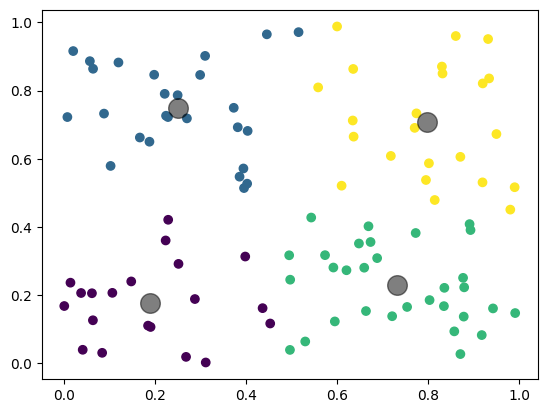

In [ ]:
# Python code for K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# K-means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


## Gaussian Mixture Models (GMM) {cite}`bishop2006pattern`

### Introduction to Gaussian Mixture Models

Gaussian Mixture Models (GMM) are a probabilistic model for representing normally distributed subpopulations within an overall population. The model assumes that the data is generated from a mixture of several Gaussian distributions, each with its own mean and variance {cite}`reynolds2009gaussian, mclachlan2004finite`. GMMs are widely used for clustering and density estimation, as they provide a method for representing complex distributions through the combination of simpler ones.

### Why Gaussian Mixture Models for Clustering?

Gaussian Mixture Models are particularly powerful in scenarios where:

- **Soft clustering is needed**: Unlike K-means, GMM provides the probability of each data point belonging to each cluster, offering a soft classification and understanding of the uncertainties in our data.
- **Flexibility in cluster covariance**: GMM allows for clusters to have different sizes and different shapes, making it more flexible to capture the true variance in the data.

### Key Components of GMM

1. **Number of Components (Gaussians)**: Similar to K in K-means, the number of Gaussians (components) is a parameter that needs to be set.
2. **Expectation-Maximization (EM) Algorithm**: GMMs use the EM algorithm for fitting, iteratively improving the likelihood of the data given the model.
3. **Covariance Type**: The shape, size, and orientation of the clusters are determined by the covariance type of the Gaussians (e.g., spherical, diagonal, tied, or full covariance).

### The EM Algorithm in GMM

The Expectation-Maximization (EM) algorithm is a two-step process:

- **Expectation Step (E-step)**: Calculate the probability that each data point belongs to each cluster.
- **Maximization Step (M-step)**: Update the parameters of the Gaussians (mean, covariance, and mixing coefficient) to maximize the likelihood of the data given these assignments.

This process is repeated until convergence, meaning the parameters do not significantly change from one iteration to the next.

### Advantages of GMM

- **Soft Clustering**: Provides a probabilistic framework for soft clustering, giving more information about the uncertainties in the data assignments.
- **Cluster Shape Flexibility**: Can adapt to ellipsoidal cluster shapes, thanks to the flexible covariance structure.

### Basic Code Implementation

Below, you'll find a basic implementation of the Gaussian Mixture Model. This should serve as an initial guide for understanding the model and applying it to your data analysis projects.


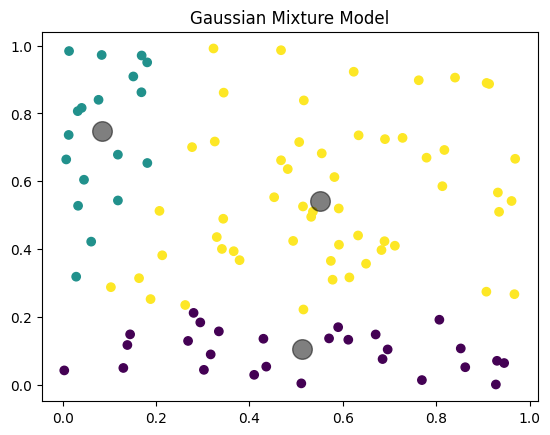

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Gaussian Mixture Model')
plt.show()


## Image Classification
Now, let's explore the application of these unsupervised methods to image classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-2 imagery.

### K-Means Implementation

In [ ]:
! ls /content/drive/MyDrive/Teaching_Michel/GEOL0069/StudentFolder/Week_4/


Chapter1_Data_Colocating_S2_S3.ipynb
Chapter1_Unsupervised_Learning_Methods.ipynb
S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE
S3B_OL_1_EFR____20190301T232521_20190301T232821_20190303T043409_0179_022_301_1800_LN1_O_NT_002.SEN3
S3B_OL_1_EFR____20190301T232521_20190301T232821_20190303T043409_0179_022_301_1800_LN1_O_NT_002.SEN3.zip
S3B_SR_2_LAN_SI_20190301T231304_20190301T233006_20230405T162425_1021_022_301______LN3_R_NT_005.SEN3
S3B_SR_2_LAN_SI_20190301T231304_20190301T233006_20230405T162425_1021_022_301______LN3_R_NT_005.SEN3.zip


In [ ]:
! pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 33.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


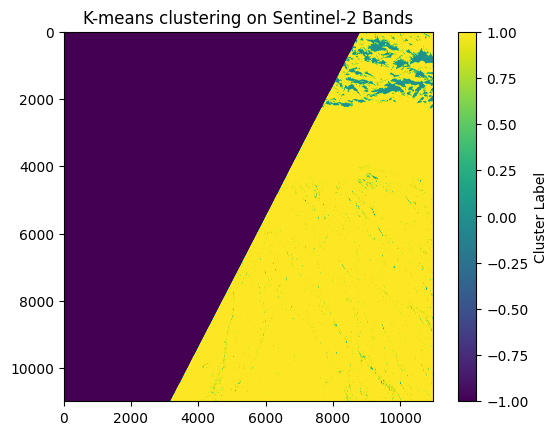

In [ ]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/Teaching_Michel/GEOL0069/StudentFolder/Week_4/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4', 'B3', 'B2']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 3))

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()


### GMM Implementation

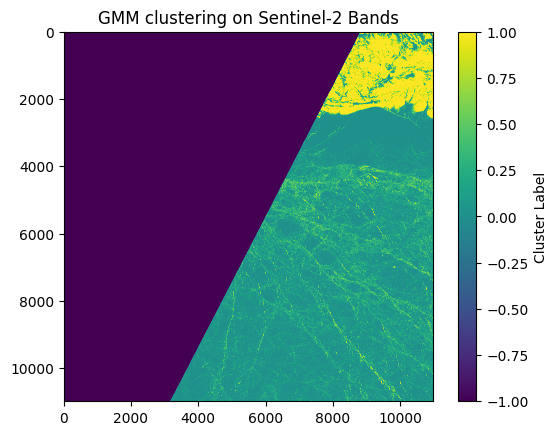

In [ ]:
import rasterio
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Paths to the band images
base_path = "/content/drive/MyDrive/Teaching_Michel/GEOL0069/StudentFolder/Week_4/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4', 'B3', 'B2']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for GMM, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 3))

# GMM clustering
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gmm.predict(X)

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place GMM labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('GMM clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()


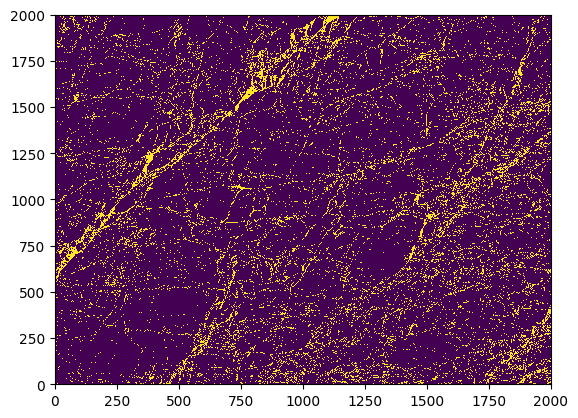

In [ ]:
plt.pcolor(labels_image[8000:10000,8000:10000])

## Altimetry Classification
Now, let's explore the application of these unsupervised methods to altimetry classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-3 altimetry dataset.

# Week 4 Deliverables (Assessed)

## Objectives
1. Classify echoes into **Sea Ice** and **Lead** using **unsupervised learning** (GMM, k=2).
2. Compute **mean echo shape** and **standard deviation** for both classes.
3. Validate against ESA official classification (`surf_type_class_20_ku`) using a **confusion matrix**.

## Outputs saved to `results/`
- mean ± std plots for ice and lead
- confusion matrix
- summary metrics text file
✅ **Code starts after the Sentinel-3 (altimetry) data are loaded below.**


### Read in Functions Needed
Before delving into the modeling process, it's crucial to preprocess the data to ensure compatibility with our analytical models. This involves transforming the raw data into meaningful variables, such as peakniness and stack standard deviation (SSD), etc.

In [1]:
! pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00


In [2]:
#
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
# from mpl_toolkits.basemap import Basemap
import numpy.ma as ma
import glob
from matplotlib.patches import Polygon
import scipy.spatial as spatial
from scipy.spatial import KDTree

import pyproj
# import cartopy.crs as ccrs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster

#=========================================================================================================
#===================================  SUBFUNCTIONS  ======================================================
#=========================================================================================================

#*args and **kwargs allow you to pass an unspecified number of arguments to a function,
#so when writing the function definition, you do not need to know how many arguments will be passed to your function
#**kwargs allows you to pass keyworded variable length of arguments to a function.
#You should use **kwargs if you want to handle named arguments in a function.
#double star allows us to pass through keyword arguments (and any number of them).
def peakiness(waves, **kwargs):

    "finds peakiness of waveforms."

    #print("Beginning peakiness")
    # Kwargs are:
    #          wf_plots. specify a number n: wf_plots=n, to show the first n waveform plots. \

    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import time

    print("Running peakiness function...")

    size=np.shape(waves)[0] #.shape property is a tuple of length .ndim containing the length of each dimensions
                            #Tuple of array dimensions.

    waves1=np.copy(waves)

    if waves1.ndim == 1: #number of array dimensions
        print('only one waveform in file')
        waves2=waves1.reshape(1,np.size(waves1)) #numpy.reshape(a, newshape, order='C'), a=array to be reshaped
        waves1=waves2

    # *args is used to send a non-keyworded variable length argument list to the function
    def by_row(waves, *args):
        "calculate peakiness for each waveform"
        maximum=np.nanmax(waves)
        if maximum > 0:

            maximum_bin=np.where(waves==maximum)
            #print(maximum_bin)
            maximum_bin=maximum_bin[0][0]
            waves_128=waves[maximum_bin-50:maximum_bin+78]

            waves=waves_128

            noise_floor=np.nanmean(waves[10:20])
            where_above_nf=np.where(waves > noise_floor)

            if np.shape(where_above_nf)[1] > 0:
                maximum=np.nanmax(waves[where_above_nf])
                total=np.sum(waves[where_above_nf])
                mean=np.nanmean(waves[where_above_nf])
                peaky=maximum/mean

            else:
                peaky = np.nan
                maximum = np.nan
                total = np.nan

        else:
            peaky = np.nan
            maximum = np.nan
            total = np.nan

        if 'maxs' in args:
            return maximum
        if 'totals' in args:
            return total
        if 'peaky' in args:
            return peaky

    peaky=np.apply_along_axis(by_row, 1, waves1, 'peaky') #numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)

    if 'wf_plots' in kwargs:
        maximums=np.apply_along_axis(by_row, 1, waves1, 'maxs')
        totals=np.apply_along_axis(by_row, 1, waves1, 'totals')

        for i in range(0,kwargs['wf_plots']):
            if i == 0:
                print("Plotting first "+str(kwargs['wf_plots'])+" waveforms")

            plt.plot(waves1[i,:])#, a, col[i],label=label[i])
            plt.axhline(maximums[i], color='green')
            plt.axvline(10, color='r')
            plt.axvline(19, color='r')
            plt.xlabel('Bin (of 256)')
            plt.ylabel('Power')
            plt.text(5,maximums[i],"maximum="+str(maximums[i]))
            plt.text(5,maximums[i]-2500,"total="+str(totals[i]))
            plt.text(5,maximums[i]-5000,"peakiness="+str(peaky[i]))
            plt.title('waveform '+str(i)+' of '+str(size)+'\n. Noise floor average taken between red lines.')
            plt.show()


    return peaky

#=========================================================================================================
#=========================================================================================================
#=========================================================================================================


def unpack_gpod(variable):

    from scipy.interpolate import interp1d

    time_1hz=SAR_data.variables['time_01'][:]
    time_20hz=SAR_data.variables['time_20_ku'][:]
    time_20hzC = SAR_data.variables['time_20_c'][:]

    out=(SAR_data.variables[variable][:]).astype(float)  # convert from integer array to float.

    #if ma.is_masked(dataset.variables[variable][:]) == True:
    #print(variable,'is masked. Removing mask and replacing masked values with nan')
    out=np.ma.filled(out, np.nan)

    if len(out)==len(time_1hz):

        print(variable,'is 1hz. Expanding to 20hz...')
        out = interp1d(time_1hz,out,fill_value="extrapolate")(time_20hz)

    if len(out)==len(time_20hzC):
        print(variable, 'is c band, expanding to 20hz ku band dimension')
        out = interp1d(time_20hzC,out,fill_value="extrapolate")(time_20hz)
    return out


#=========================================================================================================
#=========================================================================================================
#=========================================================================================================

def calculate_SSD(RIP):

    from scipy.optimize import curve_fit
    from scipy import asarray as ar,exp
    do_plot='Off'

    def gaussian(x,a,x0,sigma):
            return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

    SSD=np.zeros(np.shape(RIP)[0])*np.nan
    x=np.arange(np.shape(RIP)[1])

    for i in range(np.shape(RIP)[0]):

        y=np.copy(RIP[i])
        y[(np.isnan(y)==True)]=0

        if 'popt' in locals():
            del(popt,pcov)

        SSD_calc=0.5*(np.sum(y**2)*np.sum(y**2)/np.sum(y**4))
        #print('SSD calculated from equation',SSD)

        #n = len(x)
        mean_est = sum(x * y) / sum(y)
        sigma_est = np.sqrt(sum(y * (x - mean_est)**2) / sum(y))
        #print('est. mean',mean,'est. sigma',sigma_est)

        try:
            popt,pcov = curve_fit(gaussian, x, y, p0=[max(y), mean_est, sigma_est],maxfev=10000)
        except RuntimeError as e:
            print("Gaussian SSD curve-fit error: "+str(e))
            #plt.plot(y)
            #plt.show()

        except TypeError as t:
            print("Gaussian SSD curve-fit error: "+str(t))

        if do_plot=='ON':

            plt.plot(x,y)
            plt.plot(x,gaussian(x,*popt),'ro:',label='fit')
            plt.axvline(popt[1])
            plt.axvspan(popt[1]-popt[2], popt[1]+popt[2], alpha=0.15, color='Navy')
            plt.show()

            print('popt',popt)
            print('curve fit SSD',popt[2])

        if 'popt' in locals():
            SSD[i]=abs(popt[2])


    return SSD


In [3]:
import os
os.makedirs("results", exist_ok=True)
print("✅ created results/ folder")
print("current dir:", os.getcwd())
print("files here:", os.listdir(".")[:20])


✅ created results/ folder
current dir: /content
files here: ['.config', 'results', 'sample_data']


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import glob

base = "/content/drive/MyDrive/Week_4/"
nc_files = glob.glob(base + "**/*.nc", recursive=True)

print("Found .nc files:", len(nc_files))
for f in nc_files[:20]:
    print(f)


Found .nc files: 2
/content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/standard_measurement.nc
/content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/enhanced_measurement.nc


In [7]:
from netCDF4 import Dataset

nc_path = "/content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/standard_measurement.nc"

SAR_data = Dataset(nc_path, mode="r")

print("✅ opened:", nc_path)
print("variables count:", len(SAR_data.variables))
print("first 40 variables:")
print(list(SAR_data.variables.keys())[:40])


✅ opened: /content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/standard_measurement.nc
variables count: 138
first 40 variables:
['time_01', 'time_20_ku', 'time_20_c', 'max_multi_stack_ind', 'UTC_day_01', 'UTC_sec_01', 'UTC_day_20_ku', 'UTC_sec_20_ku', 'UTC_day_20_c', 'UTC_sec_20_c', 'UTC_time_1hz_20_ku', 'UTC_time_1hz_20_c', 'lat_01', 'lon_01', 'lat_20_ku', 'lon_20_ku', 'lat_20_c', 'lon_20_c', 'surf_type_20_ku', 'surf_class_01', 'surf_class_20_ku', 'surf_class_20_c', 'rad_surf_type_01', 'angle_coast_20_ku', 'dist_coast_20_ku', 'alt_20_ku', 'alt_20_c', 'range_water_20_ku', 'range_water_20_plrm_ku', 'range_water_qual_20_ku', 'range_water_qual_20_plrm_ku', 'sig0_water_20_ku', 'sig0_water_20_plrm_ku', 'sig0_water_qual_20_ku', 'sig0_water_qual_20_plrm_ku', 'mqe_water_20_ku', 'mqe_water_20_plrm_ku', 'range_ocog_20_ku', 'sig0_ocog_20_ku', 'elevation_ocog_20_ku']


In [8]:
SAR_data.variables

{'time_01': <class 'netCDF4.Variable'>
 float64 time_01(time_01)
     long_name: UTC: 1 Hz
     units: seconds since 2000-01-01 00:00:00.0
     standard_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (1259,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time_20_ku': <class 'netCDF4.Variable'>
 float64 time_20_ku(time_20_ku)
     long_name: UTC: 20 Hz Ku band
     units: seconds since 2000-01-01 00:00:00.0
     standard_name: time
     calendar: gregorian
     comment: Datation of SAR mode measurements (or LRM measurements acquired during early commissioning phase)
 unlimited dimensions: 
 current shape = (24827,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time_20_c': <class 'netCDF4.Variable'>
 float64 time_20_c(time_20_c)
     long_name: UTC: 20 Hz C band
     units: seconds since 2000-01-01 00:00:00.0
     standard_name: time
     calendar: gregorian
     comment: Datation of C-band and Pseudo-LRM measurements
 un

In [9]:
vars_list = list(SAR_data.variables.keys())
[target for target in vars_list if "surf" in target.lower() or "class" in target.lower()]

['surf_type_20_ku',
 'surf_class_01',
 'surf_class_20_ku',
 'surf_class_20_c',
 'rad_surf_type_01',
 'sea_ice_sea_surf_20_ku',
 'surf_type_class_20_ku',
 'mean_sea_surf_sol1_20_ku',
 'mean_sea_surf_sol1_20_c',
 'mean_sea_surf_sol1_acc_20_ku',
 'mean_sea_surf_sol1_acc_20_c',
 'mean_sea_surf_sol2_20_ku',
 'mean_sea_surf_sol2_20_c',
 'open_water_class_01_ku',
 'open_water_class_01_plrm_ku',
 'first_year_ice_class_01_ku',
 'first_year_ice_class_01_plrm_ku',
 'multi_year_ice_class_01_ku',
 'multi_year_ice_class_01_plrm_ku',
 'wet_ice_class_01_ku',
 'wet_ice_class_01_plrm_ku']

In [10]:
vars_list = list(SAR_data.variables.keys())
print("total variables:", len(vars_list))
print("first 40 variables:")
print(vars_list[:40])


total variables: 138
first 40 variables:
['time_01', 'time_20_ku', 'time_20_c', 'max_multi_stack_ind', 'UTC_day_01', 'UTC_sec_01', 'UTC_day_20_ku', 'UTC_sec_20_ku', 'UTC_day_20_c', 'UTC_sec_20_c', 'UTC_time_1hz_20_ku', 'UTC_time_1hz_20_c', 'lat_01', 'lon_01', 'lat_20_ku', 'lon_20_ku', 'lat_20_c', 'lon_20_c', 'surf_type_20_ku', 'surf_class_01', 'surf_class_20_ku', 'surf_class_20_c', 'rad_surf_type_01', 'angle_coast_20_ku', 'dist_coast_20_ku', 'alt_20_ku', 'alt_20_c', 'range_water_20_ku', 'range_water_20_plrm_ku', 'range_water_qual_20_ku', 'range_water_qual_20_plrm_ku', 'sig0_water_20_ku', 'sig0_water_20_plrm_ku', 'sig0_water_qual_20_ku', 'sig0_water_qual_20_plrm_ku', 'mqe_water_20_ku', 'mqe_water_20_plrm_ku', 'range_ocog_20_ku', 'sig0_ocog_20_ku', 'elevation_ocog_20_ku']


In [12]:
import numpy as np

y = SAR_data.variables["surf_type_class_20_ku"][:]
print("shape:", y.shape)
print("dtype:", y.dtype)
print("unique (first 20):", np.unique(y)[:20])


shape: (24827,)
dtype: int8
unique (first 20): [0 1 2 3]


In [13]:
import numpy as np

y = SAR_data.variables["surf_type_class_20_ku"][:]
vals, counts = np.unique(y, return_counts=True)
print(list(zip(vals, counts)))


[(np.int8(0), np.int64(4117)), (np.int8(1), np.int64(8918)), (np.int8(2), np.int64(3317)), (np.int8(3), np.int64(8475))]


In [15]:
print("Opened:", SAR_data.filepath())

Opened: /content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/standard_measurement.nc


In [19]:
from netCDF4 import Dataset

enhanced_nc = "/content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/enhanced_measurement.nc"
SAR_enh = Dataset(enhanced_nc)

print("Opened:", SAR_enh.filepath())
print("nvars:", len(SAR_enh.variables))

Opened: /content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/enhanced_measurement.nc
nvars: 306


In [20]:
vars_list = list(SAR_enh.variables.keys())
keys = ["wave", "wfm", "echo", "pwr", "power", "stack", "sig0", "rip"]
for k in keys:
    cand = [v for v in vars_list if k in v.lower()]
    print(k, "->", cand[:40])

wave -> ['waveform_20_ku', 'waveform_20_c', 'waveform_20_plrm_ku', 'waveform_qual_ice_20_ku']
wfm -> []
echo -> ['echo_sample_ind']
pwr -> []
power -> []
stack -> ['max_multi_stack_ind', 'nb_stack_20_ku', 'max_stack_20_ku', 'stdev_stack_20_ku', 'skew_stack_20_ku', 'kurt_stack_20_ku', 'beam_ang_stack_20_ku', 'max_loc_stack_20_ku']
sig0 -> ['sig0_water_01_ku', 'sig0_water_01_c', 'sig0_water_01_plrm_ku', 'sig0_water_20_ku', 'sig0_water_20_c', 'sig0_water_20_plrm_ku', 'sig0_water_qual_01_ku', 'sig0_water_qual_01_c', 'sig0_water_qual_01_plrm_ku', 'sig0_water_qual_20_ku', 'sig0_water_qual_20_c', 'sig0_water_qual_20_plrm_ku', 'sig0_water_rms_01_ku', 'sig0_water_rms_01_c', 'sig0_water_rms_01_plrm_ku', 'sig0_water_numval_01_ku', 'sig0_water_numval_01_c', 'sig0_water_numval_01_plrm_ku', 'sig0_ocog_20_ku', 'sig0_ocog_20_c', 'sig0_sea_ice_sheet_20_ku', 'sig0_cal_20_ku', 'sig0_cal_20_c', 'sig0_cal_20_plrm_ku', 'mod_instr_cor_sig0_01_ku', 'mod_instr_cor_sig0_01_c', 'mod_instr_cor_sig0_01_plrm_ku', '

In [21]:
v = SAR_enh.variables["waveform_20_ku"]
print("dims:", v.dimensions)
print("shape:", v.shape)
print("dtype:", v.dtype)

dims: ('time_20_ku', 'wf_sample_ind')
shape: (24827, 256)
dtype: uint32


waves shape: (24827, 256)


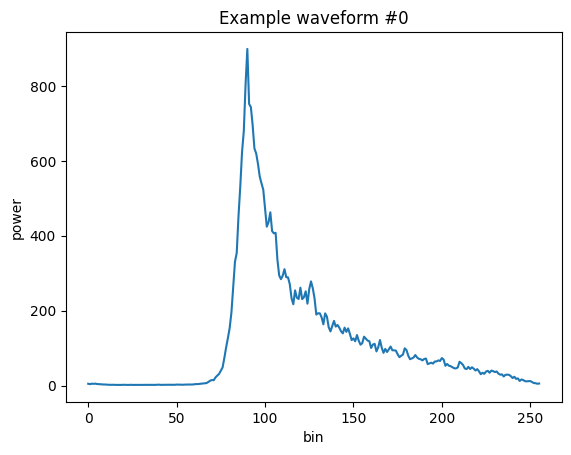

In [22]:
import numpy as np
import matplotlib.pyplot as plt

waves = SAR_enh.variables["waveform_20_ku"][:]   # (N, bins)
print("waves shape:", waves.shape)

plt.plot(waves[0])
plt.title("Example waveform #0")
plt.xlabel("bin")
plt.ylabel("power")
plt.show()

In [26]:
from netCDF4 import Dataset

standard_nc = "/content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/standard_measurement.nc"
enhanced_nc = "/content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/enhanced_measurement.nc"

SAR_std = Dataset(standard_nc)
SAR_enh = Dataset(enhanced_nc)

print("std nvars:", len(SAR_std.variables))
print("enh nvars:", len(SAR_enh.variables))

std nvars: 138
enh nvars: 306


In [27]:
import numpy as np

waves = SAR_enh.variables["waveform_20_ku"][:].astype(float)     # (N,256)
sig0  = SAR_enh.variables["sig0_water_20_ku"][:].astype(float)   # (N,)
rip   = SAR_enh.variables["rip_20_ku"][:].astype(float)          # (N,)

print("waves:", waves.shape, "sig0:", sig0.shape, "rip:", rip.shape)

waves: (24827, 256) sig0: (24827,) rip: (24827, 256)


In [29]:
vars_list = list(SAR_enh.variables.keys())

rip_candidates = [v for v in vars_list if "rip" in v.lower()]
print("RIP candidates:", rip_candidates)

for v in rip_candidates:
    arr = SAR_enh.variables[v]
    print(v, "-> shape:", arr.shape, "dims:", arr.dimensions)

RIP candidates: ['rip_20_ku']
rip_20_ku -> shape: (24827, 256) dims: ('time_20_ku', 'max_multi_stack_ind')


Opened standard: /content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/standard_measurement.nc
Opened enhanced: /content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/enhanced_measurement.nc
std nvars: 138
enh nvars: 306
ESA y unique: [0 1 2 3]
waves shape: (24827, 256)
sig0 shape: (24827,)
rip shape: (24827, 256)
GMM labels counts: [  750 24077]
Filtered N: 11792 ESA unique: [2 3]
accA(0->LEAD): 0.6563772048846676
accB(0->ICE ): 0.34362279511533245
Chosen mapping: A (0->LEAD,1->ICE)

Accuracy: 0.6563772048846676
Confusion matrix rows=true cols=pred [ICE, LEAD]:
 [[7740  735]
 [3317    0]]

Report:
               precision    recall  f1-score   support

         ICE       0.70      0.91      0.79      8475
        LEAD       0.00      0.00      0.00      3317

    accuracy                           0.66     11792
   macro avg       0.35 

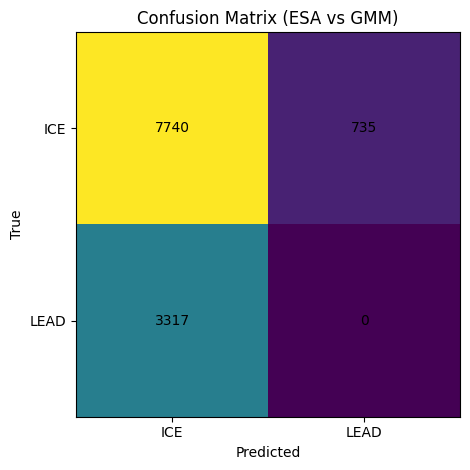

saved: results/confusion_matrix.png
Pred LEAD waveforms: (735, 256) Pred ICE waveforms: (11057, 256)


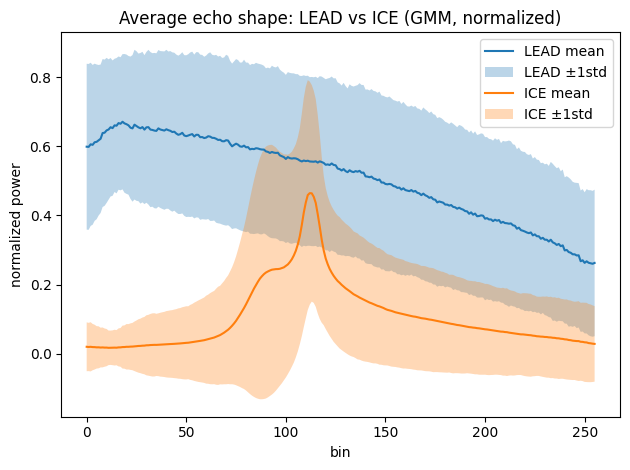

saved: results/mean_std_echo_LEAD_vs_ICE.png
saved csvs in results/


In [55]:
# =========================
# Week4 - FINAL CLEAN PIPELINE
# (LEAD vs ICE echo classification + mean/std + confusion matrix)
# =========================

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os

# -------------------------
# 0) paths (EDIT THESE TWO)
# -------------------------
standard_nc  = "/content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/standard_measurement.nc"
enhanced_nc  = "/content/drive/MyDrive/Week_4/S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3/enhanced_measurement.nc"

os.makedirs("results", exist_ok=True)

# -------------------------
# 1) open files
# -------------------------
SAR_std = Dataset(standard_nc)
SAR_enh = Dataset(enhanced_nc)

print("Opened standard:", SAR_std.filepath())
print("Opened enhanced:", SAR_enh.filepath())
print("std nvars:", len(SAR_std.variables))
print("enh nvars:", len(SAR_enh.variables))

# -------------------------
# 2) read variables
#   ESA official label from standard
#   waveform/sig0/rip from enhanced
# -------------------------
# ESA official surface type class (contains ICE/LEAD codes)
y = np.array(SAR_std.variables["surf_type_class_20_ku"][:]).astype(int)
print("ESA y unique:", np.unique(y))

# waveform: (N,256)
waves = np.array(SAR_enh.variables["waveform_20_ku"][:]).astype(float)
print("waves shape:", waves.shape)

# sigma0: (N,)
sig0 = np.array(SAR_enh.variables["sig0_water_20_ku"][:]).astype(float)
print("sig0 shape:", sig0.shape)

# rip: in your file it's (N,256)  (you verified)
rip = np.array(SAR_enh.variables["rip_20_ku"][:]).astype(float)
print("rip shape:", rip.shape)

# -------------------------
# 3) basic cleaning for waveform
# -------------------------
# Replace crazy values with NaN then clip per-echo to remove spikes
waves_clean = waves.copy()
waves_clean[(waves_clean < -1e6) | (waves_clean > 1e6)] = np.nan

lo = np.nanpercentile(waves_clean, 1, axis=1, keepdims=True)
hi = np.nanpercentile(waves_clean, 99, axis=1, keepdims=True)
waves_clean = np.clip(waves_clean, lo, hi)

# Normalize each echo by its max (avoid scale issues)
mx = np.nanmax(waves_clean, axis=1, keepdims=True)
mx[mx == 0] = np.nan
waves_norm = waves_clean / mx

# -------------------------
# 4) feature engineering for unsupervised learning (3 features)
#   - sig0
#   - PP: peakiness (simple robust version)
#   - SSD: std of waveform (no scipy!)
# -------------------------
# PP peakiness: max / mean of mid bins (avoid first bins)
mid = waves_norm[:, 20:200]
PP = np.nanmax(mid, axis=1) / (np.nanmean(mid, axis=1) + 1e-12)

# SSD: std per echo
SSD = np.nanstd(waves_norm, axis=1)

# Make feature matrix
X = np.column_stack([sig0, PP, SSD])

# Fill NaNs using column median
col_med = np.nanmedian(X, axis=0)
X = np.where(np.isnan(X), col_med, X)

# Standardize
Xn = StandardScaler().fit_transform(X)

# -------------------------
# 5) GMM clustering (2 clusters)
# -------------------------
gmm = GaussianMixture(n_components=2, random_state=0)
labels = gmm.fit_predict(Xn)  # 0/1
print("GMM labels counts:", np.bincount(labels))

# -------------------------
# 6) Focus only LEAD and ICE from ESA codes
#   (Your course uses LEAD=2, ICE=3)
# -------------------------
LEAD_CODE = 2
ICE_CODE  = 3

mask = (y == LEAD_CODE) | (y == ICE_CODE)

y2 = y[mask]          # true ESA codes (2/3)
pred = labels[mask]   # cluster id (0/1)
print("Filtered N:", y2.size, "ESA unique:", np.unique(y2))

# -------------------------
# 7) Automatically choose correct mapping (avoid flipped mapping!)
# -------------------------
pred_map_A = np.where(pred==0, LEAD_CODE, ICE_CODE)  # A: 0->LEAD, 1->ICE
pred_map_B = np.where(pred==0, ICE_CODE,  LEAD_CODE) # B: 0->ICE,  1->LEAD

accA = accuracy_score(y2, pred_map_A)
accB = accuracy_score(y2, pred_map_B)

print("accA(0->LEAD):", accA)
print("accB(0->ICE ):", accB)

pred2 = pred_map_A if accA >= accB else pred_map_B
chosen = "A (0->LEAD,1->ICE)" if accA >= accB else "B (0->ICE,1->LEAD)"
print("Chosen mapping:", chosen)

# -------------------------
# 8) Confusion matrix + report (ESA vs GMM)
# -------------------------
cm = confusion_matrix(y2, pred2, labels=[ICE_CODE, LEAD_CODE])
acc = accuracy_score(y2, pred2)

print("\nAccuracy:", acc)
print("Confusion matrix rows=true cols=pred [ICE, LEAD]:\n", cm)
print("\nReport:\n", classification_report(y2, pred2,
                                          labels=[ICE_CODE, LEAD_CODE],
                                          target_names=["ICE","LEAD"]))

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(["ICE","LEAD"])
ax.set_yticklabels(["ICE","LEAD"])
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix (ESA vs GMM)")

for i in range(2):
    for j in range(2):
        ax.text(j, i, str(cm[i,j]), ha="center", va="center")

plt.tight_layout()
plt.savefig("results/confusion_matrix.png", dpi=200)
plt.show()
print("saved: results/confusion_matrix.png")

# -------------------------
# 9) Average echo shape + std (GMM predicted LEAD vs ICE)
#   Use normalized waveforms for fair comparison
# -------------------------
waves_use = waves_norm[mask, :]  # only ESA lead/ice subset

lead_w = waves_use[pred2 == LEAD_CODE]
ice_w  = waves_use[pred2 == ICE_CODE]

lead_mean = np.nanmean(lead_w, axis=0)
lead_std  = np.nanstd(lead_w, axis=0)
ice_mean  = np.nanmean(ice_w, axis=0)
ice_std   = np.nanstd(ice_w, axis=0)

print("Pred LEAD waveforms:", lead_w.shape, "Pred ICE waveforms:", ice_w.shape)

xbin = np.arange(waves_use.shape[1])

fig, ax = plt.subplots()
ax.plot(xbin, lead_mean, label="LEAD mean")
ax.fill_between(xbin, lead_mean-lead_std, lead_mean+lead_std, alpha=0.3, label="LEAD ±1std")

ax.plot(xbin, ice_mean, label="ICE mean")
ax.fill_between(xbin, ice_mean-ice_std, ice_mean+ice_std, alpha=0.3, label="ICE ±1std")

ax.set_title("Average echo shape: LEAD vs ICE (GMM, normalized)")
ax.set_xlabel("bin")
ax.set_ylabel("normalized power")
ax.legend()
plt.tight_layout()
plt.savefig("results/mean_std_echo_LEAD_vs_ICE.png", dpi=200)
plt.show()
print("saved: results/mean_std_echo_LEAD_vs_ICE.png")

# -------------------------
# 10) Save mean/std arrays as csv
# -------------------------
np.savetxt("results/lead_mean.csv", lead_mean, delimiter=",")
np.savetxt("results/lead_std.csv",  lead_std,  delimiter=",")
np.savetxt("results/ice_mean.csv",  ice_mean,  delimiter=",")
np.savetxt("results/ice_std.csv",   ice_std,   delimiter=",")

print("saved csvs in results/")

In [56]:
from sklearn.metrics import classification_report

report_txt = classification_report(y2, pred2, labels=[ICE_CODE, LEAD_CODE], target_names=["ICE", "LEAD"])
with open("results/classification_report.txt", "w") as f:
    f.write(report_txt)
print("saved: results/classification_report.txt")

saved: results/classification_report.txt


In [57]:
with open("results/summary.txt", "w") as f:
    f.write(f"Total N (all echoes): {len(labels)}\n")
    f.write(f"Filtered N (ESA in [LEAD, ICE]): {y2.size}\n")
    f.write(f"Accuracy (ESA vs GMM): {acc:.6f}\n")
    f.write("Confusion matrix (rows=true [ICE,LEAD], cols=pred [ICE,LEAD]):\n")
    f.write(str(cm) + "\n")
print("saved: results/summary.txt")

saved: results/summary.txt


In [58]:
from google.colab import drive
drive.mount('/content/drive')

OUTDIR = "/content/drive/MyDrive/Week_4/results"
import os
os.makedirs(OUTDIR, exist_ok=True)
print("OUTDIR:", OUTDIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
OUTDIR: /content/drive/MyDrive/Week_4/results


In [60]:
!zip -r results.zip results

updating: results/ (stored 0%)
updating: results/ice_mean.csv (deflated 55%)
updating: results/summary.txt (deflated 15%)
updating: results/lead_mean.csv (deflated 57%)
updating: results/mean_std_echo_LEAD_vs_ICE.png (deflated 5%)
updating: results/confusion_matrix.png (deflated 24%)
updating: results/classification_report.txt (deflated 56%)
updating: results/lead_std.csv (deflated 58%)
updating: results/ice_std.csv (deflated 56%)
